In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load the preprocessed data
preprocessed_data = pd.read_csv('50_Startups.csv')


In [3]:
# Split the data into features (X) and target (y)
X = preprocessed_data[['R&D Spend', 'Administration', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]
y = preprocessed_data['Profit']


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create and evaluate models
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Support Vector Machine", SVR()),
    ("Gradient Boosting", GradientBoostingRegressor())
]

In [6]:
model_accuracies = []

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    model_accuracies.append((model_name, mse, r2))
    
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("-----------------------------")

Model: Linear Regression
Mean Squared Error: 82010363.04
R-squared: 0.90
-----------------------------
Model: Decision Tree
Mean Squared Error: 103361155.62
R-squared: 0.87
-----------------------------
Model: Random Forest
Mean Squared Error: 72841049.58
R-squared: 0.91
-----------------------------
Model: Support Vector Machine
Mean Squared Error: 955520803.79
R-squared: -0.18
-----------------------------
Model: Gradient Boosting
Mean Squared Error: 73438969.23
R-squared: 0.91
-----------------------------


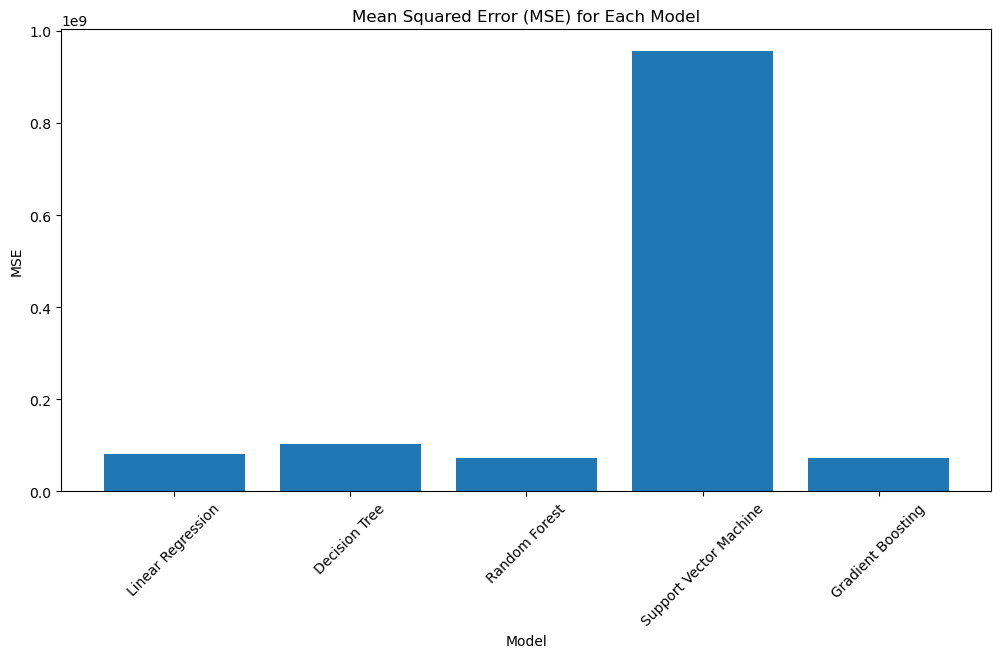

In [11]:
# Display each model's accuracy using a bar chart
model_names = [model[0] for model in model_accuracies]
mse_values = [model[1] for model in model_accuracies]

plt.figure(figsize=(12, 6))
plt.bar(model_names, mse_values)
plt.title("Mean Squared Error (MSE) for Each Model")
plt.xlabel("Model")
plt.ylabel("MSE")
plt.xticks(rotation=45)
plt.show()
